# Run from here if you don't have the network_dataset.csv file

In [3]:
import pandas as pd

df1_null = pd.read_csv("dataset/Network datatset/csv/attack_1.csv", sep=",", encoding="utf-8")
df2_nul = pd.read_csv("dataset/Network datatset/csv/attack_2.csv", sep=",", encoding="utf-8")
df3_nul = pd.read_csv("dataset/Network datatset/csv/attack_3.csv", sep=",", encoding="utf-8")
df4_nul = pd.read_csv("dataset/Network datatset/csv/attack_4.csv", sep=",", encoding="utf-8")
df5_nul = pd.read_csv("dataset/Network datatset/csv/normal.csv", sep=",", encoding="utf-8")



In [4]:
# List of DataFrames
df_list = [df1_null, df2_nul, df3_nul, df4_nul, df5_nul]

# Remove leading and trailing spaces from column names for each DataFrame
for i, df in enumerate(df_list):
    df.columns = df.columns.str.strip()

# Unpack the updated DataFrames back into separate variables
df1, df2, df3, df4, df5 = df_list


In [6]:
print(df1.columns)
print(df4.columns)

right_order = df1.columns
right_order = df4.columns




Index(['Time', 'mac_s', 'mac_d', 'ip_s', 'ip_d', 'sport', 'dport', 'proto',
       'flags', 'size', 'modbus_fn', 'n_pkt_src', 'n_pkt_dst',
       'modbus_response', 'label_n', 'label'],
      dtype='object')
Index(['Time', 'mac_s', 'mac_d', 'ip_s', 'ip_d', 'sport', 'dport', 'proto',
       'flags', 'size', 'modbus_fn', 'modbus_response', 'n_pkt_src',
       'n_pkt_dst', 'label_n', 'label'],
      dtype='object')


In [7]:
# Concatenate the DataFrames vertically
df = pd.concat([df1, df2, df3, df4, df5], axis=0, ignore_index=True)

# Save the concatenated DataFrame to a CSV file
df.to_csv("dataset/Network datatset/csv/network_dataset.csv", index=False, encoding="utf-8")


# Run from here if you already have the network_dataset.csv file

In [53]:
import pandas as pd


df = pd.read_csv("dataset/Network datatset/csv/network_dataset.csv")
print(df.head())


                         Time              mac_s              mac_d  \
0  2021-04-09 18:23:28.385003  74:46:a0:bd:a7:1b  0a:fe:ec:47:74:fb   
1  2021-04-09 18:23:28.385005  74:46:a0:bd:a7:1b  e6:3f:ac:c9:a8:8c   
2  2021-04-09 18:23:28.385006  74:46:a0:bd:a7:1b  fa:00:bc:90:d7:fa   
3  2021-04-09 18:23:28.385484  0a:fe:ec:47:74:fb  74:46:a0:bd:a7:1b   
4  2021-04-09 18:23:28.385486  fa:00:bc:90:d7:fa  74:46:a0:bd:a7:1b   

           ip_s          ip_d    sport    dport   proto    flags  size  \
0   84.3.251.20  84.3.251.102  56667.0    502.0  Modbus  11000.0    66   
1   84.3.251.20  84.3.251.101  56666.0    502.0  Modbus  11000.0    66   
2   84.3.251.20  84.3.251.103  56668.0    502.0  Modbus  11000.0    66   
3  84.3.251.102   84.3.251.20    502.0  56667.0  Modbus  11000.0    64   
4  84.3.251.103   84.3.251.20    502.0  56668.0  Modbus  11000.0    64   

             modbus_fn  n_pkt_src  n_pkt_dst modbus_response  label_n   label  
0   Read Coils Request        0.0        0.0    

In [54]:
# Drop the 'Time' column
df = df.drop(columns=["Time"])



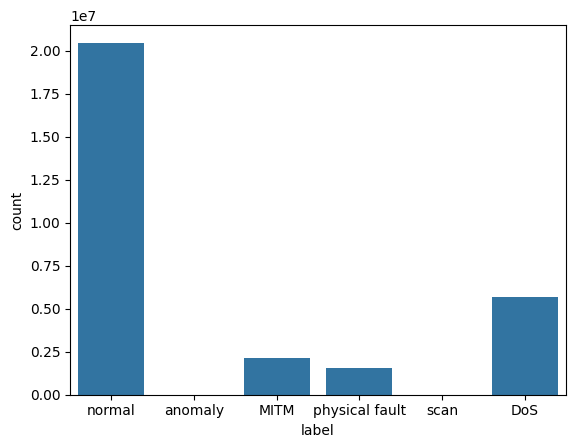

In [55]:
#i want you to give me the number of row for each value in label column with a box plot
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="label", data=df)
plt.show()

In [56]:


# Drop rows where label is "scan"
df = df[df["label"] != "scan"]

# Separate rows with label = "normal" and other labels
normal_rows = df[df["label"] == "normal"]
other_rows = df[df["label"] != "normal"]


In [57]:
# Reduce the number of "normal" rows to half using sampling
normal_rows = normal_rows.sample(frac=0.3, random_state=42)

df = pd.concat([normal_rows, other_rows], ignore_index=True)


In [58]:
df = df.sample(frac=0.2, random_state=42)  # Optional: set random_state for reproducibility
df = df.dropna()
df = df.drop(columns=['sport', 'proto', 'flags'], errors='ignore')


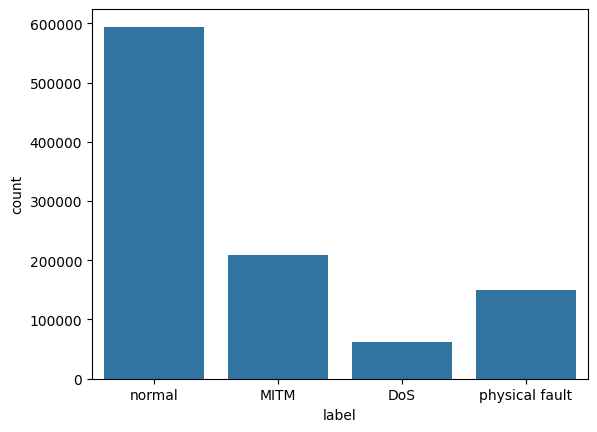

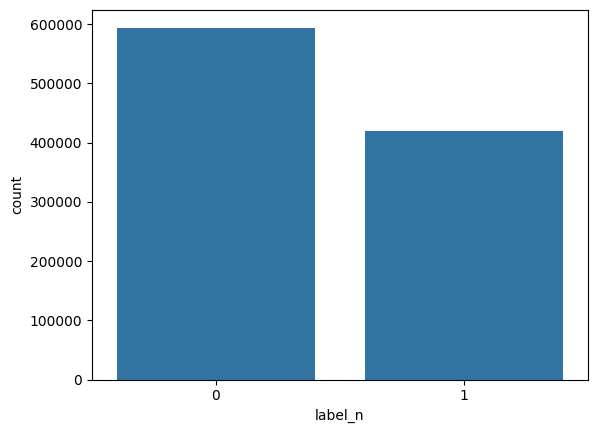

In [59]:
#i want you to give me the number of row for each value in label column with a box plot and save it in images_network folder
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="label", data=df)
plt.savefig("images_network/label_distribution.png")
plt.show()

sns.countplot(x="label_n", data=df)
plt.savefig("images_network/2classes.png")

In [60]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Encode MAC and IP addresses using Label Encoding
label_encoder = LabelEncoder()
df['mac_s_enc'] = label_encoder.fit_transform(df['mac_s'])
df['mac_d_enc'] = label_encoder.fit_transform(df['mac_d'])

# Convert IP addresses to integers
df['ip_s_enc'] = df['ip_s'].apply(lambda x: int(''.join(x.split('.'))))
df['ip_d_enc'] = df['ip_d'].apply(lambda x: int(''.join(x.split('.'))))

# Handle 'modbus_response' column, which contains string representations of numbers
# Convert the string representation of lists to integers
df['modbus_response'] = df['modbus_response'].apply(lambda x: int(x.strip('[]')))

# One-Hot Encode modbus function
df = pd.get_dummies(df, columns=['modbus_fn'], drop_first=True)

# Drop original MAC and IP columns
df.drop(columns=['mac_s', 'mac_d', 'ip_s', 'ip_d'], inplace=True)

df = df.drop(columns=['sport', 'proto'], errors='ignore')


In [61]:
# Save the concatenated DataFrame to a CSV file
df.to_csv("dataset/Network datatset/csv/network_mini_dataset.csv", index=False, encoding="utf-8")



# Run from here if you have the network_mini_datset in you folder dataset(it's already preprocessed)

In [62]:
import pandas as pd
df = pd.read_csv("dataset/Network datatset/csv/network_mini_dataset.csv")

In [63]:

# Separate features and target
X = df.drop(columns=['label_n', 'label'])
y = df['label_n']




In [64]:
print(df.nunique()[df.nunique() == 1])

print(X.columns)


Series([], dtype: int64)
Index(['dport', 'size', 'n_pkt_src', 'n_pkt_dst', 'modbus_response',
       'mac_s_enc', 'mac_d_enc', 'ip_s_enc', 'ip_d_enc',
       'modbus_fn_Read Holding Registers Response'],
      dtype='object')


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
#from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import time
import numpy as np

from pprint import pprint

# Separate features and target
X = df.drop(columns=['label_n', 'label'])
y = df['label_n']



# Define models to test
models = {
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'CART': DecisionTreeClassifier(random_state=15),
    'Random Forest': RandomForestClassifier(random_state=15, n_estimators=100),
    # 'XGBoost': XGBClassifier(random_state=15),
    'CatBoost': CatBoostClassifier(random_state=15, verbose=False),
    "SVM": SVC(random_state=15, kernel="rbf"),
    "Naive Bayes": GaussianNB()
}

# Initialize KFold
kfold = KFold(n_splits=5, shuffle=True, random_state=15)

for model_name, model in models.items():
    # Initialize lists to store metrics
    metrics = {metric: [] for metric in ['accuracy', 'precision', 'recall', 'f1']}
    
    start = time.time()
    
    # Perform k-fold cross validation
    for train_idx, test_idx in kfold.split(X, y):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]
        
        # Train and evaluate model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        report = classification_report(y_test, y_pred, output_dict=True)
        # pprint(report)
        metrics['accuracy'].append(accuracy_score(y_test, y_pred))
        metrics['precision'].append(report['macro avg']['precision'])
        metrics['recall'].append(report['macro avg']['recall'])
        metrics['f1'].append(report['macro avg']['f1-score'])

    # Print results
    print(f"\nModel: {model_name} ran on {len(metrics['accuracy'])} folds in {time.time() - start:.2f} seconds")
    for metric in metrics:
        print(f'Average {metric.title()}(macro avg): {np.mean(metrics[metric]):.2f} ± {np.std(metrics[metric]):.2f}')


Model: KNN ran on 5 folds in 8.88 seconds
Average Accuracy(macro avg): 0.74 ± 0.00
Average Precision(macro avg): 0.68 ± 0.00
Average Recall(macro avg): 0.67 ± 0.01
Average F1(macro avg): 0.68 ± 0.01

Model: CART ran on 5 folds in 0.50 seconds
Average Accuracy(macro avg): 0.76 ± 0.00
Average Precision(macro avg): 0.71 ± 0.00
Average Recall(macro avg): 0.66 ± 0.00
Average F1(macro avg): 0.68 ± 0.00

Model: Random Forest ran on 5 folds in 19.51 seconds
Average Accuracy(macro avg): 0.76 ± 0.00
Average Precision(macro avg): 0.71 ± 0.00
Average Recall(macro avg): 0.66 ± 0.00
Average F1(macro avg): 0.68 ± 0.00

Model: CatBoost ran on 5 folds in 28.78 seconds
Average Accuracy(macro avg): 0.76 ± 0.00
Average Precision(macro avg): 0.73 ± 0.01
Average Recall(macro avg): 0.65 ± 0.01
Average F1(macro avg): 0.67 ± 0.01


/Users/pro/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pro/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pro/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",


Model: SVM ran on 5 folds in 586.59 seconds
Average Accuracy(macro avg): 0.71 ± 0.00
Average Precision(macro avg): 0.35 ± 0.00
Average Recall(macro avg): 0.50 ± 0.00
Average F1(macro avg): 0.41 ± 0.00

Model: Naive Bayes ran on 5 folds in 0.23 seconds
Average Accuracy(macro avg): 0.71 ± 0.00
Average Precision(macro avg): 0.35 ± 0.00
Average Recall(macro avg): 0.50 ± 0.00
Average F1(macro avg): 0.41 ± 0.00


/Users/pro/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pro/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/pro/Desktop/python/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is",